# GrapeLeaves
I'm going to try to use the dataset I found [here](https://https://www.kaggle.com/datasets/rm1000/augmented-grape-disease-detection-dataset) to make something. \\
THIS IS JUST A TEST

In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train = 'Data/archive/grape_dataset/train'
test = 'Data/archive/grape_dataset/test'

img_size = (160, 160)

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#automatically infers the labels based on the directory structure
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical')

Found 7222 images belonging to 4 classes.
Found 1805 images belonging to 4 classes.


Lets try doing a CNN  \\
input -> Conv 1 -> Pool 1 -> Conv 2 -> Pool 2 -> Flattening -> Fully connected layer -> Output

In [6]:
%pip install scipy
%pip install keras
%pip install pillow

import scipy as scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 classes
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)


Num GPUs Available:  0



Epoch 1/10


 62/226 [=======>......................] - ETA: 1:26 - loss: 0.9157 - accuracy: 0.6297

KeyboardInterrupt: 

In [ ]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


1/1 [==============================] - 0s 120ms/step


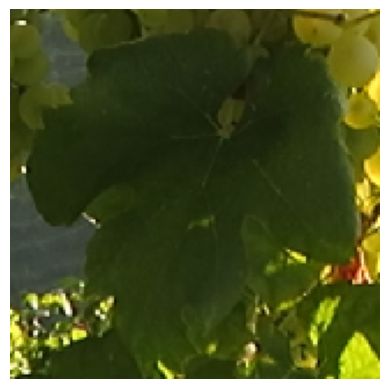

Predicted: Grape___healthy
1/1 [==============================] - 0s 29ms/step


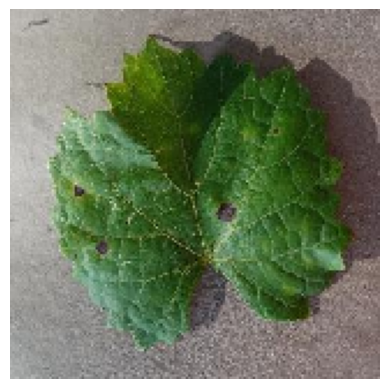

Predicted: Grape___healthy
1/1 [==============================] - 0s 28ms/step


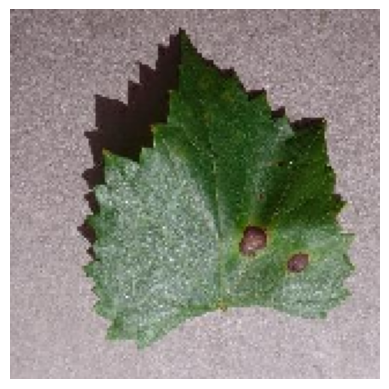

Predicted: Grape____Black_rot
1/1 [==============================] - 0s 31ms/step


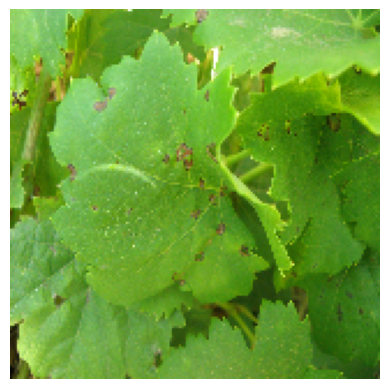

Predicted: Grape____Blight
1/1 [==============================] - 0s 28ms/step


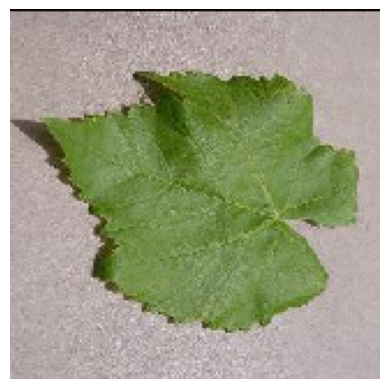

Predicted: Grape___healthy
1/1 [==============================] - 0s 29ms/step


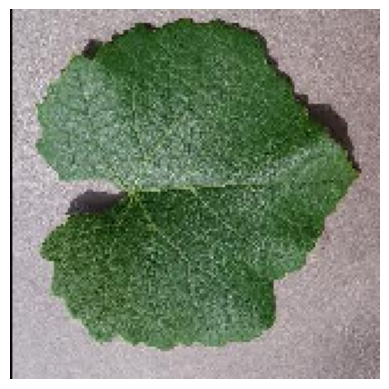

Predicted: Grape___healthy
1/1 [==============================] - 0s 28ms/step


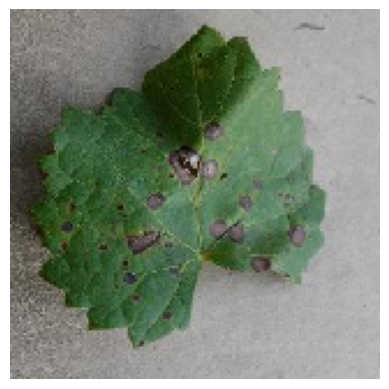

Predicted: Grape____Black_rot
1/1 [==============================] - 0s 37ms/step


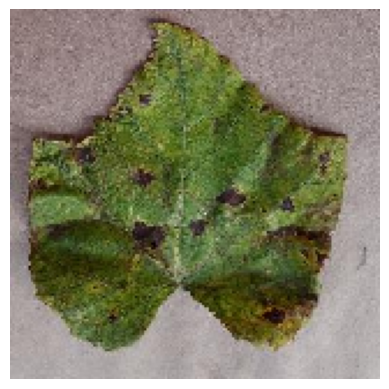

Predicted: Grape____Blight
1/1 [==============================] - 0s 27ms/step


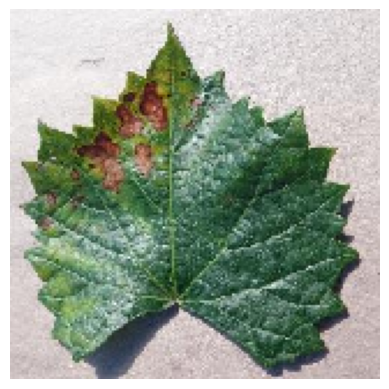

Predicted: Grape____Esca
1/1 [==============================] - 0s 36ms/step


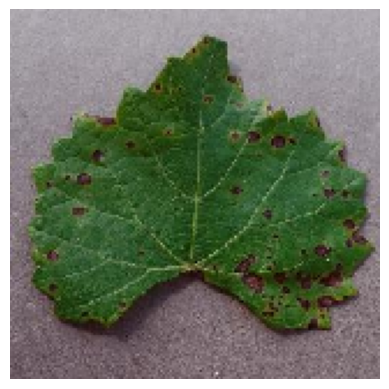

Predicted: Grape____Black_rot
1/1 [==============================] - 0s 30ms/step


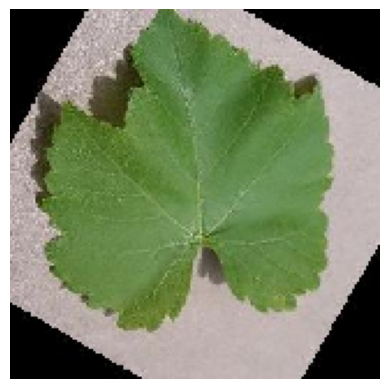

Predicted: Grape___healthy
1/1 [==============================] - 0s 28ms/step


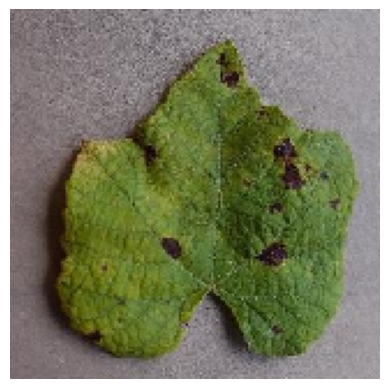

Predicted: Grape____Blight


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import decode_predictions

labels = ['Grape____Black_rot', 'Grape____Esca', 'Grape____Blight', 'Grape___healthy']

def decode_predictions(preds, labels):
    pred_label = labels[np.argmax(preds)]
    return pred_label

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    image = image_utils.load_img(image_path, target_size=(160, 160))
    image = image_utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

# Make a prediction
def predict_image(model, image_path):
    image = load_and_preprocess_image(image_path)
    preds = model.predict(image)
    return preds

# Visualize the prediction
def visualize_prediction(image_path, preds):
    image = image_utils.load_img(image_path, target_size=(160, 160))
    plt.imshow(image)
    plt.axis('off')

    # Decode the prediction
    pred_label = decode_predictions(preds, labels)
    
    # Print the prediction
    print('Predicted:', pred_label)


import os

# Directory containing images
image_dir = 'Data/Random images'

# Iterate over all images in the directory
for filename in os.listdir(image_dir):
    # Construct full image path
    image_path = os.path.join(image_dir, filename)
    
    # Make a prediction
    preds = predict_image(model, image_path)
    
    # Create a new figure
    plt.figure()
    
    # Visualize the image
    image = image_utils.load_img(image_path, target_size=(160, 160))
    plt.imshow(image)
    plt.axis('off')
    plt.show()  # This will display the current image
    
    # Decode and print the prediction
    pred_label = decode_predictions(preds, labels)
    print('Predicted:', pred_label)


